# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

Will be using [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [scikit-learn](http://scikit-learn.org/stable/).

Instructions:


*   Questions are marked by the sign ⏩. Provide the answer after the question, either in a code cell or in a text cell (or both).
*   Upload the notebook on the website of the course. Direct emails will be ignored. -- Deadline : one week after the day of the lab. 
* Your notebook is an individual work. 


In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline

/var/folders/hz/zdjmtw794kb0xp726t0svss40000gn/T/ipykernel_22158/1436791190.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## I. The Dataset

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [3]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

⏩ **1) Use `data.head()` and `data.head(10)`: describe the dataset.**

In [4]:
print(data.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


The data set is a table with 4 columns and 5 data rows. data.head() returns the first 5 rows by default. Each row represents the advertising dollars/cost spent on each of the "TV," "Radio," and "Newspaper" products along with the "Sales" for each of the product.

In [5]:
print(data.head(10))

       TV  Radio  Newspaper  Sales
1   230.1   37.8       69.2   22.1
2    44.5   39.3       45.1   10.4
3    17.2   45.9       69.3    9.3
4   151.5   41.3       58.5   18.5
5   180.8   10.8       58.4   12.9
6     8.7   48.9       75.0    7.2
7    57.5   32.8       23.5   11.8
8   120.2   19.6       11.6   13.2
9     8.6    2.1        1.0    4.8
10  199.8    2.6       21.2   10.6


The data set is a table with 4 columns and 5 data rows. data.head(10) returns the first 10 rows (if they exist). Each row represents the advertising dollars/cost spent on each of the "TV," "Radio," and "Newspaper" products along with the "Sales" for each of the product.

What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

⏩ **2) Use data.shape. How many examples are contained in the dataset?**

⏩ **3) Use data.describe() and provide your comments.**

In [6]:
print(data.shape)

(200, 4)


There are 200 examples in the data set.

In [7]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


The data.describe() function gives a convenient way to get an overview of the dataset, including information about the statistical data of count of non-null data,
maximum/minimum/mean/standard deviation/percentiles of the values in the dataset.

⏩ **4) Use data['Name_column'].hist() to draw the histogram of the sales. Set the parameters in order to plot 20 bins (= bars of the histogram. On the histogram, locate the 25% quantile given by the describe() method of the previous question.**

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Histogram of Sales')

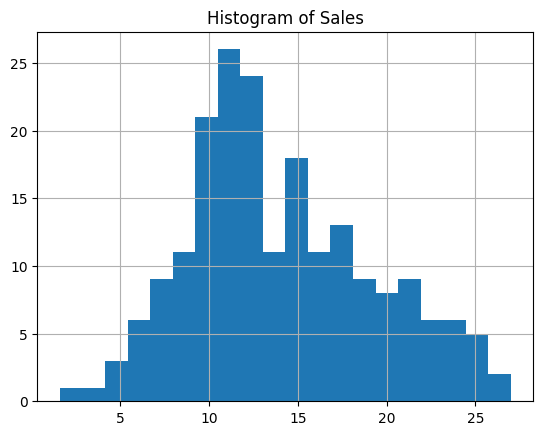

In [72]:
print(data['Sales'].hist(bins=20))
plt.title("Histogram of Sales")

From the histogram and the results of data.describe() above, the 25% percentile for Sales is at 10.375 and it's easily identifiable as the 25%th percentile.

⏩ **5) Comment the result of data.boxplot(). What is the interest of this plot?**

Axes(0.125,0.11;0.775x0.77)


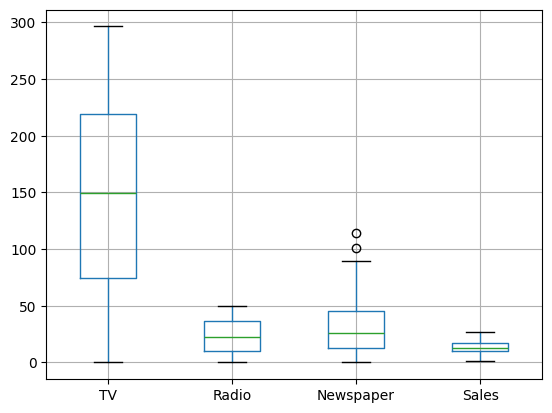

In [9]:
print(data.boxplot())

This box plot is useful for graphically depicting groups of data using their quartiles. The boxes stretch from the Q1 to Q3 quartile values of the data, with a line at the median, which is Q2. The whiskers of the graph extend from the edges of box represent the range of the data. The two outliers are plotted as separate dots for the Newspaper column.


⏩ **5) Use data.plot(kind='scatter', x=..., y=...) to vizualize the relationship between the features and the response. Comment about the relevance of the use of a linear model.**

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Plot of TV vs Sales')

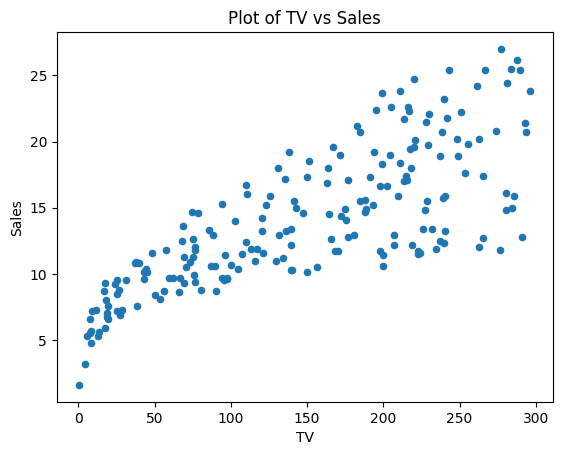

In [10]:
print(data.plot(kind='scatter',x=0,y=3))
plt.title("Plot of TV vs Sales")

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Plot of Radio vs Sales')

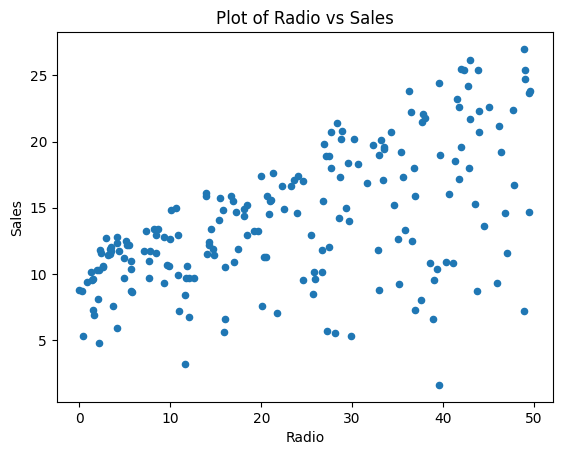

In [11]:
print(data.plot(kind='scatter',x=1,y=3))
plt.title("Plot of Radio vs Sales")

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Plot of Newspaper vs Sales')

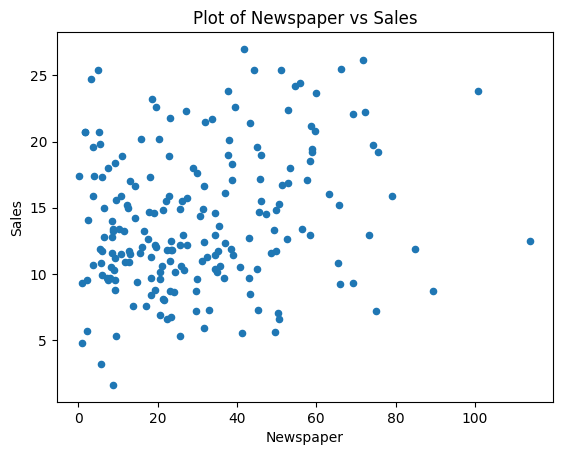

In [12]:
print(data.plot(kind='scatter',x=2,y=3))
plt.title("Plot of Newspaper vs Sales")

In each of the plots, we have two variables - one is dependent and one is independent. It is relevant to use a linear model since based on the X value we can predict the y value using the data set that we have. The cloud of data is concentrated for all three plots and using a linear model would be a good approach in this case of supervising learning.

⏩ **6) Use data.corr() in order to plot the correlation coefficients.**

**Comment about the coefficient on the diagonal.**

**What feature is the most correlated to the sales?**

**Plot the correlation matrix as a heatmap using sns.heatmap(...,annot=True)** 

In [13]:
print(data.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


Axes(0.125,0.11;0.62x0.77)


Text(0.5, 1.0, 'Plot of Correlation Coefficients')

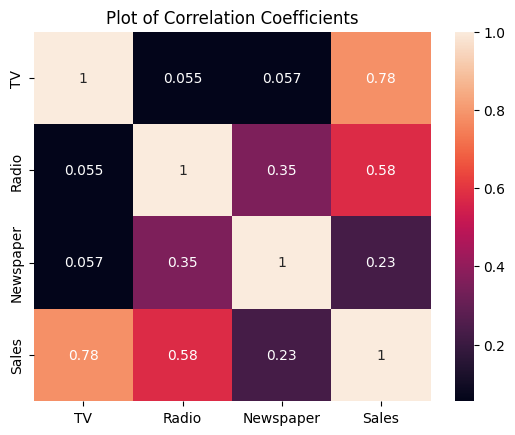

In [14]:
correlation_matrix = data.corr()
print(sns.heatmap(correlation_matrix,annot=True))
plt.title("Plot of Correlation Coefficients")

The coefficient of the diagonal is '1' showing that the correlation coefficient or linear dependence for each feature with its own self is 1. 

'TV' is the most correlated with Sales since it has the highest correlating coefficient value (0.78) under Sales

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## II. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):
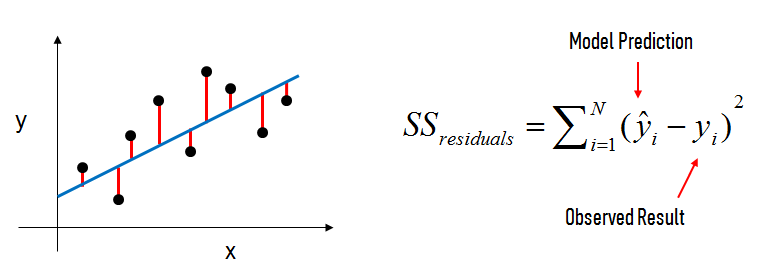

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

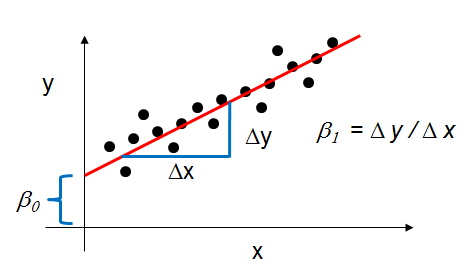





⏩ **7) We are going to do linear regression of the sales with respect to ONE variable amongst 'TV', 'Radio', 'Newspaper'. According to what you have seen from the dataset, which column would you like to keep? Write it down under the form:**

`columns = ['Name of the column you want to keep']`

In [15]:
columns = ['TV']

⏩ **8) Run the code below and try to understand it. What are the value of $\beta_0$ and $\beta_1$ of you model?**

In [16]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(data[columns],data['Sales'])
ls.intercept_,ls.coef_[0]

(7.0325935491276885, 0.04753664043301979)

The $\beta_0$ : 7.0325935491276885
and 

$\beta_1$ : 0.04753664043301979

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

⏩ **9) Let's say that there was a new market where the spend in the advertising channel you considered was $50,000. What would we predict for the Sales in that market? Make the prediction "by hand" using sums and multiplication of numbers.**

In [17]:
# manually calculate the prediction
print(7.0325935491276885 + 0.04753664043301979 * 50000)

2383.8646152001174


$y = \beta_0 + \beta_1x$

The $\beta_0$ : 7.0325935491276885

and 

$\beta_1$ : 0.04753664043301979 

and

$x : 50000$

$y = 7.0325935491276885 + 0.04753664043301979 * 50000$

$y = 2383.8646152001174$ widgets

⏩ **10) Use sklearn's predict method to recover the above result:**



```
New_data = pd.DataFrame({'Name of your column' : [the value]})
ls.predict(New_data)[0]
```




In [18]:
New_data = pd.DataFrame({'TV':[50000]})
ls.predict(New_data)[0]

2383.8646152001174

⏩ **11) Using `ls.predict`, generate the predictions $\hat y_i$ for the whole dataset. On the same graph, plot the scattered points $(x_i,y_i)$ and the line passing through the points $(x_i,\hat y_i)$.**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


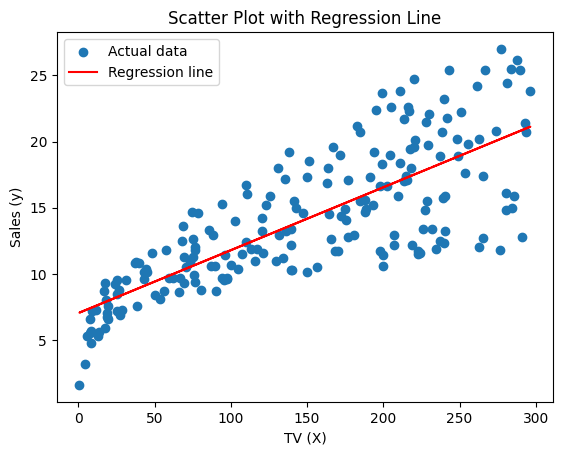

In [19]:
predicted_data = ls.predict(data[columns].values)

plt.scatter(data[columns],data['Sales'],label='Actual data')

plt.plot(data[columns],predicted_data, color='red', label='Regression line')

plt.xlabel('TV (X)')
plt.ylabel('Sales (y)')
plt.title('Scatter Plot with Regression Line')

plt.legend()

plt.show()

⏩ **12) Write your comments. How happy are you with the model?**

I think the model looks pretty good, the line is almost in the middle of the data cloud and it passes through a lot of actual points. The residuals are also not that big, so that’s a plus. We can establish a relation between sales and tv advertising cost and the higher the cost spent the higher our sales will be and the model is good. But there are still a good chunk of data points that have high residuals.

## III. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

⏩ **13) Include all the three columns in the model and re-train a least-square estimator using scikit-learn. Provide the values of the coefficients $\beta_i$.**

In [64]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
columns = ['TV', 'Radio','Newspaper']
ls.fit(data[columns],data['Sales'])
ls.intercept_,ls.coef_[0],ls.coef_[1]

(2.9388893694594014, 0.04576464545539764, 0.18853001691820453)

The $\beta_0$ : 2.9388893694594014

and 

$\beta_1$ : 0.04576464545539764

and 

$\beta_2$ : 0.18853001691820453

⏩ **14) For a given amount of Radio and Newspaper ad spending, how much is the increase of sells resulting from a $1000 increase in TV ad spending?**

In [62]:
data_2 = data.copy()
data_2['TV'] = data_2['TV'] + 1000
ls_2 = LinearRegression()
columns = ['TV', 'Radio','Newspaper']
ls_2.fit(data_2[columns],data_2['Sales'])
ls_2.intercept_,ls_2.coef_[0],ls_2.coef_[1]

(-42.82575608593819, 0.0457646454553976, 0.1885300169182046)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


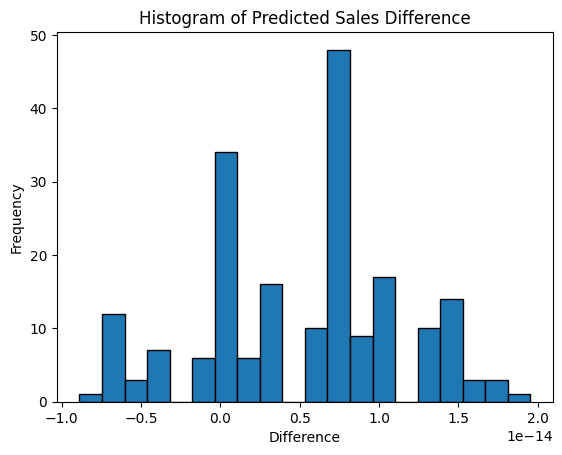

In [73]:
predicted_1 = ls.predict(data[columns].values)
predicted_2 = ls_2.predict(data_2[columns].values)
predicted_difference = predicted_2 - predicted_1
plt.hist(predicted_difference, bins=20, edgecolor='black')
plt.title("Histogram of Predicted Sales Difference")
plt.xlabel("Difference")
plt.ylabel("Frequency")

plt.show()


In [76]:
np.mean(predicted_difference)

5.144773496112976e-15

From the histogram plot and the calculations above, the average predicted difference is 5.144773496112976 * 10^(-15) which is significantly very small and close to 0 and shows precision in our model.

### Linear Gaussian model and confidence intervals

Our aim is now to compute confidence intervals on each of the coefficients $\beta_i$ at the level 95%. A way to think of a confidence interval is the following: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient. Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

To that end, we make the assumption that the model is homoscedastic, which means linear, Gaussian, and with a constant variance $\sigma^2$:
$$
Y \sim {\mathcal N}(\Phi \beta,\sigma^2 I_N)
$$
where $N$ is the number of sambles, $d=3$ is the number of regressors, $\Phi$ is the $N\times (d+1)$ design matrix containing the values of the regressors (TV, Radio, Newspaper), $\beta=(\beta_0,\dots,\beta_d)^T$ and $\sigma^2$ are the unknown parameters, and $I_N$ is the $N\times N$ identity matrix.

A 95% confidence interval on $\beta_k$ is given by:
$$
\hat\beta_k \pm q \sqrt{\frac {\hat\sigma^2 s_k}N}
$$
where $s_k$ is the $k$ th coefficient of the diagonal of $(\Phi^T\Phi)^{-1}$, $\hat \sigma^2$ is the estimated variance of the residuals, given by:
$$
\hat \sigma^2 = \frac{\|Y-\hat Y\|^2}{N-d-1}
$$

⏩ **15) What is $q$ in the above formula?**

$q$ is the critical value that corresponds to the desired level of confidence. 

For a 95% confidence interval, $q$ is the value in a way the interval contains approximately 95% of the area under the standard normal distribution curve.

For a standard normal distribution, $q$ is  the "z-value."

For a 95% confidence interval, $q$ = 1.96

⏩ **16) Draw the histogram of the residuals $e_i=\hat y_i-y_i$, using 20 bins.**

**Without calculating it numerically, what is APPROXIMATELY the mean and the standard deviation?**

**Does it make sense to assume that the residuals are Gaussian?**

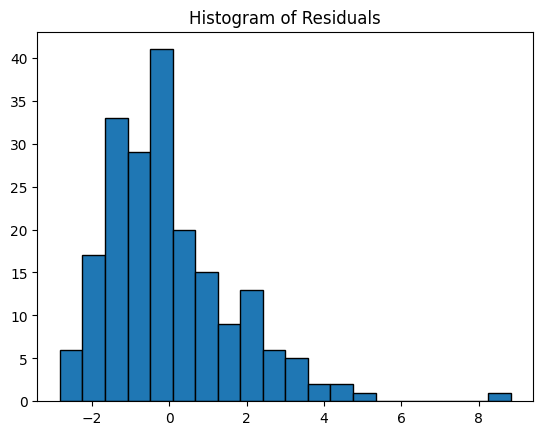

In [81]:
residuals = predicted_1 - data['Sales']
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

Just by looking at the histogram, the mean of the residuals is very close to 0 (between -0.5 and 0.5), which suggests that the model is really good in predicting the sales values. 

Since the difference between predicted values and the real values are very small, we can see that it's a good sign for our model since we want it to be as close as possible to 0. 

The following function computes confidence intervals. The syntax is as follows:


```
confidence_interval(X,y,a,k)
```

where `X` is a $N\times d$ pandas dataframe corresponding to the design matrix, `y` is a pandas series corresponding to the labels, $a$ is the confidence level between 0 and 1 (typically set to 0.95), and $k\in\{0,1,\dots,d\}$ represents the variable you would like to consider.

⏩ **17) Compute the confidence intervals for the 3 variables.**

In [23]:
def confidence_interval(X,y,a,k):
  assert(a<1)
  (N,d) = X.shape
  lsf = LinearRegression()
  lsf.fit(X,y)
  variance = np.linalg.norm(y.values-lsf.predict(X))**2/(N-d-1)
  Phi = np.concatenate((np.reshape(np.ones(N),(N,1)),X.to_numpy()),axis=1)
  s = np.diag(np.linalg.inv(np.dot(Phi.T,Phi)))[k]
  q = stats.t(df=N-d-1).ppf(1-(1-a)/2)
  return (lsf.coef_[k-1]-q*np.sqrt(variance*s/N),lsf.coef_[k-1]+q*np.sqrt(variance*s/N))

In [89]:
tv_confidence = confidence_interval(data[columns], data['Sales'], 0.95, 0)
radio_confidence = confidence_interval(data[columns], data['Sales'], 0.95, 1)
newspaper_confidence = confidence_interval(data[columns], data['Sales'], 0.95, 2)
print("TV: ", tv_confidence, "Radio: ",  radio_confidence, "Newspaper: ", newspaper_confidence)

TV:  (-0.044533546721463195, 0.04245856063651073) Radio:  (0.04557012508264854, 0.04595916582814675) Newspaper:  (0.18732916791434026, 0.1897308659220688)


⏩ **18) Compute confidence intervals at 99%. Based on this result, if you wanted to eliminate one feature from the model, which one would it be? Explain.**

In [90]:
tv_confidence = confidence_interval(data[columns], data['Sales'], 0.99, 0)
radio_confidence = confidence_interval(data[columns], data['Sales'], 0.99, 1)
newspaper_confidence = confidence_interval(data[columns], data['Sales'], 0.99, 2)
print("TV: ", tv_confidence, "Radio: ",  radio_confidence, "Newspaper: ", newspaper_confidence)

TV:  (-0.05840638505570525, 0.05633139897075279) Radio:  (0.04550808382934816, 0.04602120708144713) Newspaper:  (0.18694616341886594, 0.19011387041754313)


Based on the above results, the confidence interval for 'TV' has a wider range of confidence interval compared to other variables, which will result in more uncertainty when we predict the estimate.

## IV. Model selection by cross-validation

Consider we seek to choose between two models:


*   The first one includes all the columns `TV`, `Radio`, `Newspaper`
*   The second one includes only `TV` and `Radio`

Which one should one choose?

**Cross-validation.** provides a reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

⏩ **19) Use sklearn `train_test_split` method to spli the data into a train and a test set (see the doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Then, fit two linear regressors on the train set only: one using all features, the other using only `TV` and`Radio`.**

In [146]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data)
ls_3 = LinearRegression()
columns_3 = ['TV', 'Radio','Newspaper']
ls_3.fit(data_train[columns_3],data_train['Sales'])
ls_4 = LinearRegression()
columns_4 = ['TV', 'Radio']
ls_4.fit(data_train[columns_4],data_train['Sales'])

LinearRegression()

⏩ **20) Use sklearn `mean_squared_error` (doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) to compare the mean squared error of both models, on the test set.**

In [148]:
from sklearn.metrics import mean_squared_error
predicted_all_trained_features = ls_3.predict(data_train[columns_3].values)
mse_1 = mean_squared_error(data_train['Sales'], predicted_all_trained_features)
print("Mean squared error for the model with all 3 features: ", mse_1)
predicted_two_trained_features = ls_4.predict(data_train[columns_4].values)
mse_2 = mean_squared_error(data_train['Sales'], predicted_two_trained_features)
print("Mean squared error for the model with only 'TV' and 'Radio' features: ", mse_2)

Mean squared error for the model with all 3 features:  3.257867458390756
Mean squared error for the model with only 'TV' and 'Radio' features:  3.259735075602003


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


⏩ **21) Observe that the mean square error vary, when you re-run the cells corresponding to Questions 21 and 22. How do you explain this?**

⏩ **22) Between the two models, which one would you recommend? Justify.**

⏩ **23) To choose between two models, your method seems to depend on the ratio of the test set versus the train set. Can you see a more rigorous method allowing to cross-validate the model?**

The variability in the MSE when re-running the cells above can be attributed to the randomness inherent in the splitting of the dataset into training and test sets. When we split the data, different subsets of samples are used for training and testing in each run. This randomness can lead to variability in the performance metrics, such as MSE, due to the specific samples chosen for each set.

___

Between the two models, the MSE of the first model with all the features is always less than the MSE of the model with 'TV' and 'Radio' only. The first model with lower MSE on the test set is better as it indicates better predictive performance on unseen data. Hence, I recommend the model with all the features!

___

Instead of relying on a single split of the data into training and test sets, cross-validation would be more rigorous if we partition the dataset into multiple subsets, train the model on different subsets, and evaluate its performance on the remaining subsets.

One technique is k-fold cross-validation, where the dataset is divided into k folds, and the model is trained and tested k times, each time using a different fold as the test set. The performance metrics are then averaged over the k runs, providing a more rigorous estimate.

Cross-validation helps mitigate the impact of a single random split and provides a more reliable assessment of how well the model is likely to perform on unseen data.

For a more rigorous evaluation and model selection, techniques like k-fold cross-validation provide a more stable estimate of the model's performance across different data partitions as compared to a single split. The ratio here is (k-1) : 1 for each fold.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.